In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj2b.ok')

Assignment: proj2b
OK, version v1.13.11



# Project 2 Part B: Spam/Ham Classification
## Classifiers
### The assignment is due on Monday, April 27th at 11:59pm PST.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment
In Project 2 Part A, you made an effort to understand the data through EDA, and did some basic feature engineering. You also built a Logistic Regression model to classify Spam/Ham emails. In Part B, you will learn how to evaluate the classifiers you built. You will also have the chance to improve your model by selecting more features.

## Warning
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 6
8 | 6
9 | 15
Total | 37

## Setup

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [3]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

Using version already downloaded: Tue Apr 21 00:55:44 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Tue Apr 21 00:55:45 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


The following code is adapted from Part A of this project. You will be using it again in Part B.

In [4]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email']) 
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), array([0, 0, 0, 0, 0]))

Recall that you trained the following model in Part A.

In [5]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


## Evaluating Classifiers

The model you trained doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [6]:
zero_predictor_fp = 0 
zero_predictor_fn = len(train[train["spam"] == 1])
zero_predictor_fp, zero_predictor_fn

(0, 1918)

In [7]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [8]:
zero_predictor_acc = len(train[train["spam"] == 0])/len(train)
zero_predictor_recall = 0
zero_predictor_acc, zero_predictor_recall

(0.7447091707706642, 0)

In [9]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c

Provide brief explanations of the results from 6a and 6b. Explain why the number of false positives, number of false negatives, accuracy, and recall all turned out the way they did.

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

1. 6a: False positive will be 0 since the zero_predictor always predicts 0 and not positive. Therefore, zero_predictor won't ever predict true positive so the false negative is equal to the sum of spams.
6b: The zero_predictor accuracy is equal to the average of the number of hams (over total number of emails). Recall is equal to 0 because no positives are predicted.
2. -false positives: FP=0 since there are no labels of spam.
-number of false negatives: FN=1918. This number is equal to the number of spam emails from the training data, as all spam emails are incorrectly labeled as ham emails.
-accuracy: The classifier is able to accurately label 74.47% of observations from the training data.
-recall: The classifier recalls none, or 0%, of the observations of spam.

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Part A. Do **NOT** use any `sklearn` functions.

**Note: In lecture we used the `sklearn` package to compute the rates. Here you should work through them using just the definitions to help build a deeper understanding.**

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [10]:
Y_train_hat = model.predict(X_train)
FP = sum((Y_train_hat == 1) & (Y_train_hat != Y_train))
FN = sum((Y_train_hat == 0) & (Y_train_hat != Y_train))
TP = sum((Y_train_hat == 1) & (Y_train_hat == Y_train))
TN = sum((Y_train_hat == 0) & (Y_train_hat == Y_train))
logistic_predictor_precision = TP / (TP + FP)
logistic_predictor_recall = TP / (TP + FN)
logistic_predictor_far = FP / (FP + TN)
print(logistic_predictor_precision)
print(logistic_predictor_recall)
print(logistic_predictor_far)
print(TP)
print(TN)
print(FN)
print(FP)

0.6422287390029325
0.11418143899895725
0.021805183199285077
219
5473
1699
122


In [11]:
ok.grade("q6d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Part A?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

There are more false negatives than false positives. FN=1699, while FP=122, and 1699 > 122.

### Question 6f

1. Our logistic regression classifier got 75.8% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

1. This compares with predicting 0 for every email because 74.47% means that we are only doing a bit better than guessing that all the emails are classified as ham. Nevertheless, our logistic regression classifier is better since 74.47% is less than 75.8%.
2. This classifer is performing poorly because there are too many 0's in X_train, which means that the words chosen are not in most of the emails. This is because these words can be super prevalent, as not every word is commonly utilized in an email. Therefore, the classifier is unable to actually use those words to differentiate spam or ham emails.
3. I would prefer the logistic regression classifier for a spam filter. This is because it would have a higher prediction accuracy and the recall metric of the zero predictor is 0.

## Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

**Kaggle limits you to four submissions per day**. This means you should start early so you have time if needed to refine your model. You will be able to see your accuracy on the entire set when submitting to Kaggle (the accuracy that will determine your score for question 9).

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 7, 8, and 9 should help guide you.

---

**Note:** *You should use the **validation data** to evaluate your model and get a better sense of how it will perform on the Kaggle evaluation.*

---

Text(0.5, 0, 'Total number of punctuations')

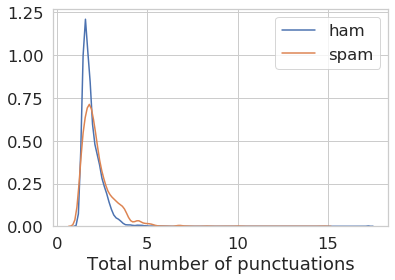

In [12]:
# Count number of punctuations in emails

def non_charactor(x):
    aregex = '[^a-zA-Z0-9]'
    sregex = '\w+'
    num_words = x['email'].str.findall(aregex).str.len()
    num_space = x['email'].str.findall(sregex).str.len()
    return num_words / num_space

ham = train[train['spam'] == 0]
spam = train[train['spam'] == 1]

h_punc = non_charactor(ham)
s_punc = non_charactor(spam)

sns.distplot(h_punc, label = 'ham', hist=False)
sns.distplot(s_punc, label = 'spam', hist=False)

plt.xlabel('Total number of punctuations')

Text(0.5, 0, 'Number of capital letters')

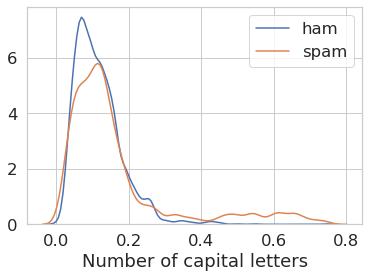

In [13]:
# Number of capital letters in subject

def find_cap_length(df):
    reg = r'[A-Z]'
    return ((df['subject'].str.findall(reg).str.len()) / df['subject'].str.len()).fillna(0)

h_cap = find_cap_length(ham) 
s_cap = find_cap_length(spam) 

sns.distplot(h_cap, label = 'ham', hist=False)
sns.distplot(s_cap, label = 'spam', hist=False)
plt.xlabel('Number of capital letters')

Text(0.5, 0, 'Number of non-capital letters')

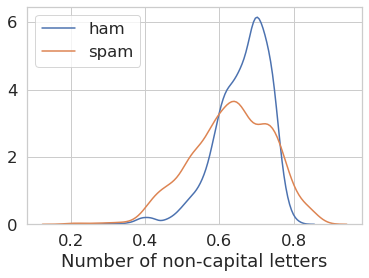

In [14]:
# Number of non-capital letters

def find_noncap_length(df):
    reg = r'[a-z]'
    return ((df['email'].str.findall(reg).str.len()) / df['email'].str.len()).fillna(0)

h_cap = find_noncap_length(ham) 
s_cap = find_noncap_length(spam) 

sns.distplot(h_cap, label = 'ham', hist=False)
sns.distplot(s_cap, label = 'spam', hist=False)
plt.xlabel('Number of non-capital letters')

6.470281543274244
2.0875781948168006


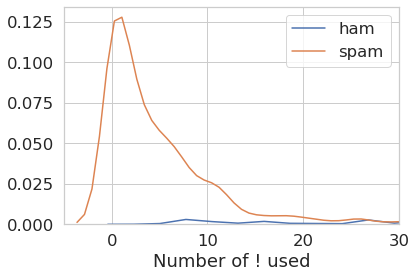

In [15]:
# Number of times '!' is used

def num_punct(df):
    return df['email'].str.findall('!').str.len().fillna(0)

ham_punct = num_punct(ham)
spam_punct = num_punct(spam)

sns.distplot(ham_punct, label = 'ham', hist=False)
sns.distplot(spam_punct, label = 'spam', hist=False)

plt.xlabel('Number of ! used')

plt.xlim(-5, 30)

print(spam_punct.sum() / len(spam['email']))
print(ham_punct.sum() / len(ham['email']))

In [16]:
# After doing some research, I compiled a list of common spam words:
# https://www.simplycast.com/blog/100-top-email-spam-trigger-words-and-phrases-to-avoid/#post
# https://www.automational.com/spam-trigger-words-to-avoid/
# https://blog.hubspot.com/blog/tabid/6307/bid/30684/the-ultimate-list-of-email-spam-trigger-words.aspx

my_words = ['#1', '$$$', '100%', 'act now', 'affordable', 'action', 'cancel', 'apply now', 'online pharmacy',
            'billing', 'avoid', 'boss', 'cancel', 'cash', 'bonus', 'casino', 'certified', 'priority mail',
            'cheap', 'click here', 'clearance', 'buy', 'congratulations', 'collect', 'print out and fax',
            'credit card', 'freedom', 'expire', 'extra', 'debt', 'free access', 'great', 'outstanding', 'deals',
           'guarantee', 'friend', 'income', 'junk', 'offer', 'only', 'now', 'rates', 'no selling', 'removal',
            'refinance', 'refund', 'remove', 'request', 'risk-free', 'satisfaction', 'score', 'important', 'brand new',
            'success', 'terms', 'supplies', 'spam', 'please', 'promise', 'presently', 'purchase', 'amazing',
            'quote', 'serious', 'win', 'urgent', 'winner', 'unlimited', 'terms', 'traffic', 'free leads', 'easy money',
           'while supplies last', 'save', 'url', '50% off', 'ad', 'all new','bargain', 'best price', 'no catch',
            'bonus', 'brand new pager', 'cost', 'discount', 'do not delete', 'email harvest', 'bill 1618',
            'for free','free trial', 'give it away', 'internet market', 'incredible deal', 'cancel at any time',
           'insurance', 'luxury', 'mortgage', 'name brand', 'outstanding values','please read', 'double', 'vitality',
            'sample', 'stuff on sale', 'the best rates', 'sale','click', 'accept', 'accordingly', 'collect',
            'as seen on', 'avoid', 'check','click below', 'direct email', 'do it today', 'form', 'good', 'boost sales',
            'free instant','investment', 'life insurance', 'lifetime', 'never', 'now', 'order', 'all new', '0%',
           'pennies a day', 'per day', 'phone', 'print form signature', 'quote','regarding', 'join', 'low', '99.9%',
            'save up to', 'sign up free today', 'take action', 'call','get it now', 'once in a lifetime', 'no costs',
            'this will not last', 'time limited','while supplies last', '4u', 'access', 'avoid bankruptcy', 
            'bulk email','cures', 'dormant', 'free info', 'free membership', 'get out of debt','hello', 'lower fees',
            'join millions', 'no age restrictions', 'no inventory', 'opportunity', 'save big money', 'extra cash',
            'see for yourself', 'you are a winner!','all natural', 'big bucks', 'billion dollars', 'earn', 
            'home', 'lose', 'home employment', 'lose weight', 'make money', 'no cost', 'no fees', 'stop', 
           'vacation', 'weight', 'serious cash', 'remove wrinkles', 'address', 'copy accurately', 'hidden',
           'shopper', 'order status', 'clearance', 'meet singles', 'double your', 'make $', 'online degree',
           'ear per week', 'extra income', 'potential earnings', 'while you sleep', 'claims', 'bargain',
           'cashcashcash', 'cents on the dollar', 'compare rates', 'hidden assets', 'only $', 'US dollars',
           'subject to credit', 'price', 'full refund', 'stock alert', 'sent in compliance', 'get paid', 
           'consolidate your debt', 'social security number', 'pre-approved', 'chance', 'here', 'leave', 
           'maintained', 'passwords', 'reverses', 'teen', 'wife', 'dear', 'notspam', 'open', 'opt in', 'bargain hunter',
           'performance', 'the following form', 'search engine listings', 'visit our website', 'unsubscribe',
           'will not believe your eyes', 'diagnostics', 'medicine', 'no medical exams', 'viagra', 'thousands'
           '100% more', 'additional income', 'best price', 'expect to earn', 'be your own boss', 'fast cash',
           'financial freedom', 'free access', 'free consultation', 'free hosting', 'free money', 'giveaway',
           'free preview', 'increase sales', 'lower rates', 'million dollars', 'miracle', 'one time', 'prize',
           'pure profit', 'call now', 'get it now', 'become a member', 'exclusive deal', 'get started now',
           'important information regarding', 'instant', 'limited time', 'new customers only', 'please read',
           'you have been selected', 'confidentiality', 'hidden charges', 'internet marketing', 'mass email',
           'no gimmick', 'no purchase necessary', 'undisclosed', 'unsolicited', 'valium', 'vicodin', 'xanax',
           'all new', 'beneficiary', 'cheap', 'fantastic', 'score', 'terms and conditions', 'warranty', 'best',
           'amazed', 'auto email removal', 'beverage', 'cable converter', 'celebrity', 'collect child support',
           'compete for your business', 'do it today', 'easy terms', 'expect to', 'free cell phone', 'loan',
           'message contains', 'new customers only', 'no obligation', 'rolex', 'sex', 'score with babes', 
           'warrant', 'talks about prizes', 'they keep your money', 'the best rates', 'no strings attached',
           'drastically reduced', 'get it now', 'special promotion', 'this will not last', 'please read', 'do',
           'eliminate', 'reverses aging', 'what do you have to lose', 'fast delivery', 'nigerian', 'friendly',
           'apply', 'buy now', 'click me to download', 'click this link', 'click to remove', 'call free',
           'claim now', 'contact us immediately', 'get now', 'sign up', 'shop now', 'order now', 'accounts',
           'finance', 'financial advice', 'free investment', 'investment decision', 'invoice', 'million',
           'potential earnings', 'nominated bank account', 'profit', 'stock alert', 'gift certificate', 'market',
           'member', 'off everything', 'offer extended', 'optimization', 'stop further distribution', 
           'super promo', 'the following form', 'this is not junk', 'top urgent', 'web traffic', 'free hosting',
           'home based business', 'home employment', 'work from home', '@public', 'hello@', 'mail@', '!!', 'mlm',
           'cards accepted', 'for free?', 'money-back guarantee', 'more info', 'onetime mail', '$$', '18+', 'xxx',
           'adult en', 'adults', 'be 18', 'over 18', 'over 21', '99.9%', 'amazing stuff', 'auto', 'judgments',
           'credit bureaus', 'consolidate debt and credit', 'confidentially on all orders', 'hesitate', 'hurry up',
           'increase your chances', 'if only it were that easy', 'in accordance with laws', 'instant earnings',
           'it is effective', 'laser printer', 'free iphone', 'lose weight spam', 'meet singles', 'meet girls', 
           'meet me', 'never before', 'new domain extensions', 'no catch', 'no deposit required', 'number 1', 'ip',
           'not intended', 'offshore', 'expiration date', 'one hundred percent free', 'online biz', 'pure profits',
           'print out and fax', 'reverses', 'see for yourself', 'safeguard', 'stop emailing me', 'subscribe now',
           'subscribe for free', 'take action now', 'terms and conditions', 'talks about hidden charges', 'reminder',
           'time limited', 'unsecured credit', 'undisclosed recipient', 'university diplomas', 'vip', 'vicodin',
           'wants credit card', 'warranty expired', 'we honor all', 'website visitors', 'weekend getaway', 'right',
           'husband', 'while available', 'what is keeping you', 'why pay more?', 'what are you waiting for?', 'zero',
           'zero chance', 'zero percent', 'zero risk', 'your chance', 'your status', 'do it now or', 'stop now', 
           'dear friend', 'be amazed', 'double your profit', 'not expensive', 'deadline', 'obligation', 'safe', 'gain',
           'pre-order', 'take our survey', 'learn more', 'read more', 'contact us', 'schedule an appointment', 
           're:', 'fwd:', '%', '#', 'explode your business', 'join billions', 'great offer', 'high pay', 'watch this',
           'last opportunity', 'certified', 'cost', 'compare', 'form', 'leave', 'request', 'serious', 'weight', 'phone',
           'f r e e', 'hidden assets', 'one hundred percent free', 'pennies a day', 'refinance', 'subject to credit', 
           'unsecured debt', 'acceptance', 'month trial offer', 'more internet traffic', 'one time mailing', 'notspam']

my_model = LogisticRegression(C=2)

X_train = words_in_texts(my_words, train['email'])
# X_train = pd.DataFrame(X_train)
# X_train['non charater'] = find_cap_length(train)
Y_train = train['spam']

my_model.fit(X_train, Y_train)

training_acc = my_model.score(X_train, Y_train)
print(training_acc)

X_val = words_in_texts(my_words, val['email'])
# X_val = pd.DataFrame(X_val)
# X_val['non character'] = find_cap_length(val)
Y_val = val['spam']

val_acc = my_model.score(X_val, Y_val)
print(val_acc)

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9608678290962333
0.9437125748502994


### Question 7: Feature/Model Selection Process

In the following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->
<!-- EXPORT TO PDF -->

1. I found better features for my model by listing possible features out and plotting them. Then, I compared which ones would be a better fit. Some words would appear more in ham emails than spams. The words that was the most common in every email would be a really good feature to have.
2. Many features did not work. As I plotted each and compared the distribution of them in ham emails and spam emails, I found some features worked significantly better than others. Bad features would have a low bar and we could not receive any information from that feature (probably because it did not appear in most emails). It surprised me that common words such as "you" did not help distinguish the ham/spam emails. Instead, I tried to find words that were more commonly used, such as "html", which would be common due to the tags.
3. Some things that were surprising to me in my search for good features were that 'from' was used so much, even more than 'html' which was used also for tags. Though it is a good word to use, I did not think it would be that common. Furthermore, 'money' was also utilized a good amount, which is weird because it is not that common of a word unless one is talking solely about financial plans. 

### Question 8: EDA

In the cell below, show a visualization that you used to select features for your model. Include

1. A plot showing something meaningful about the data that helped you during feature selection, model selection, or both.
2. Two or three sentences describing what you plotted and its implications with respect to your features.

Feel to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

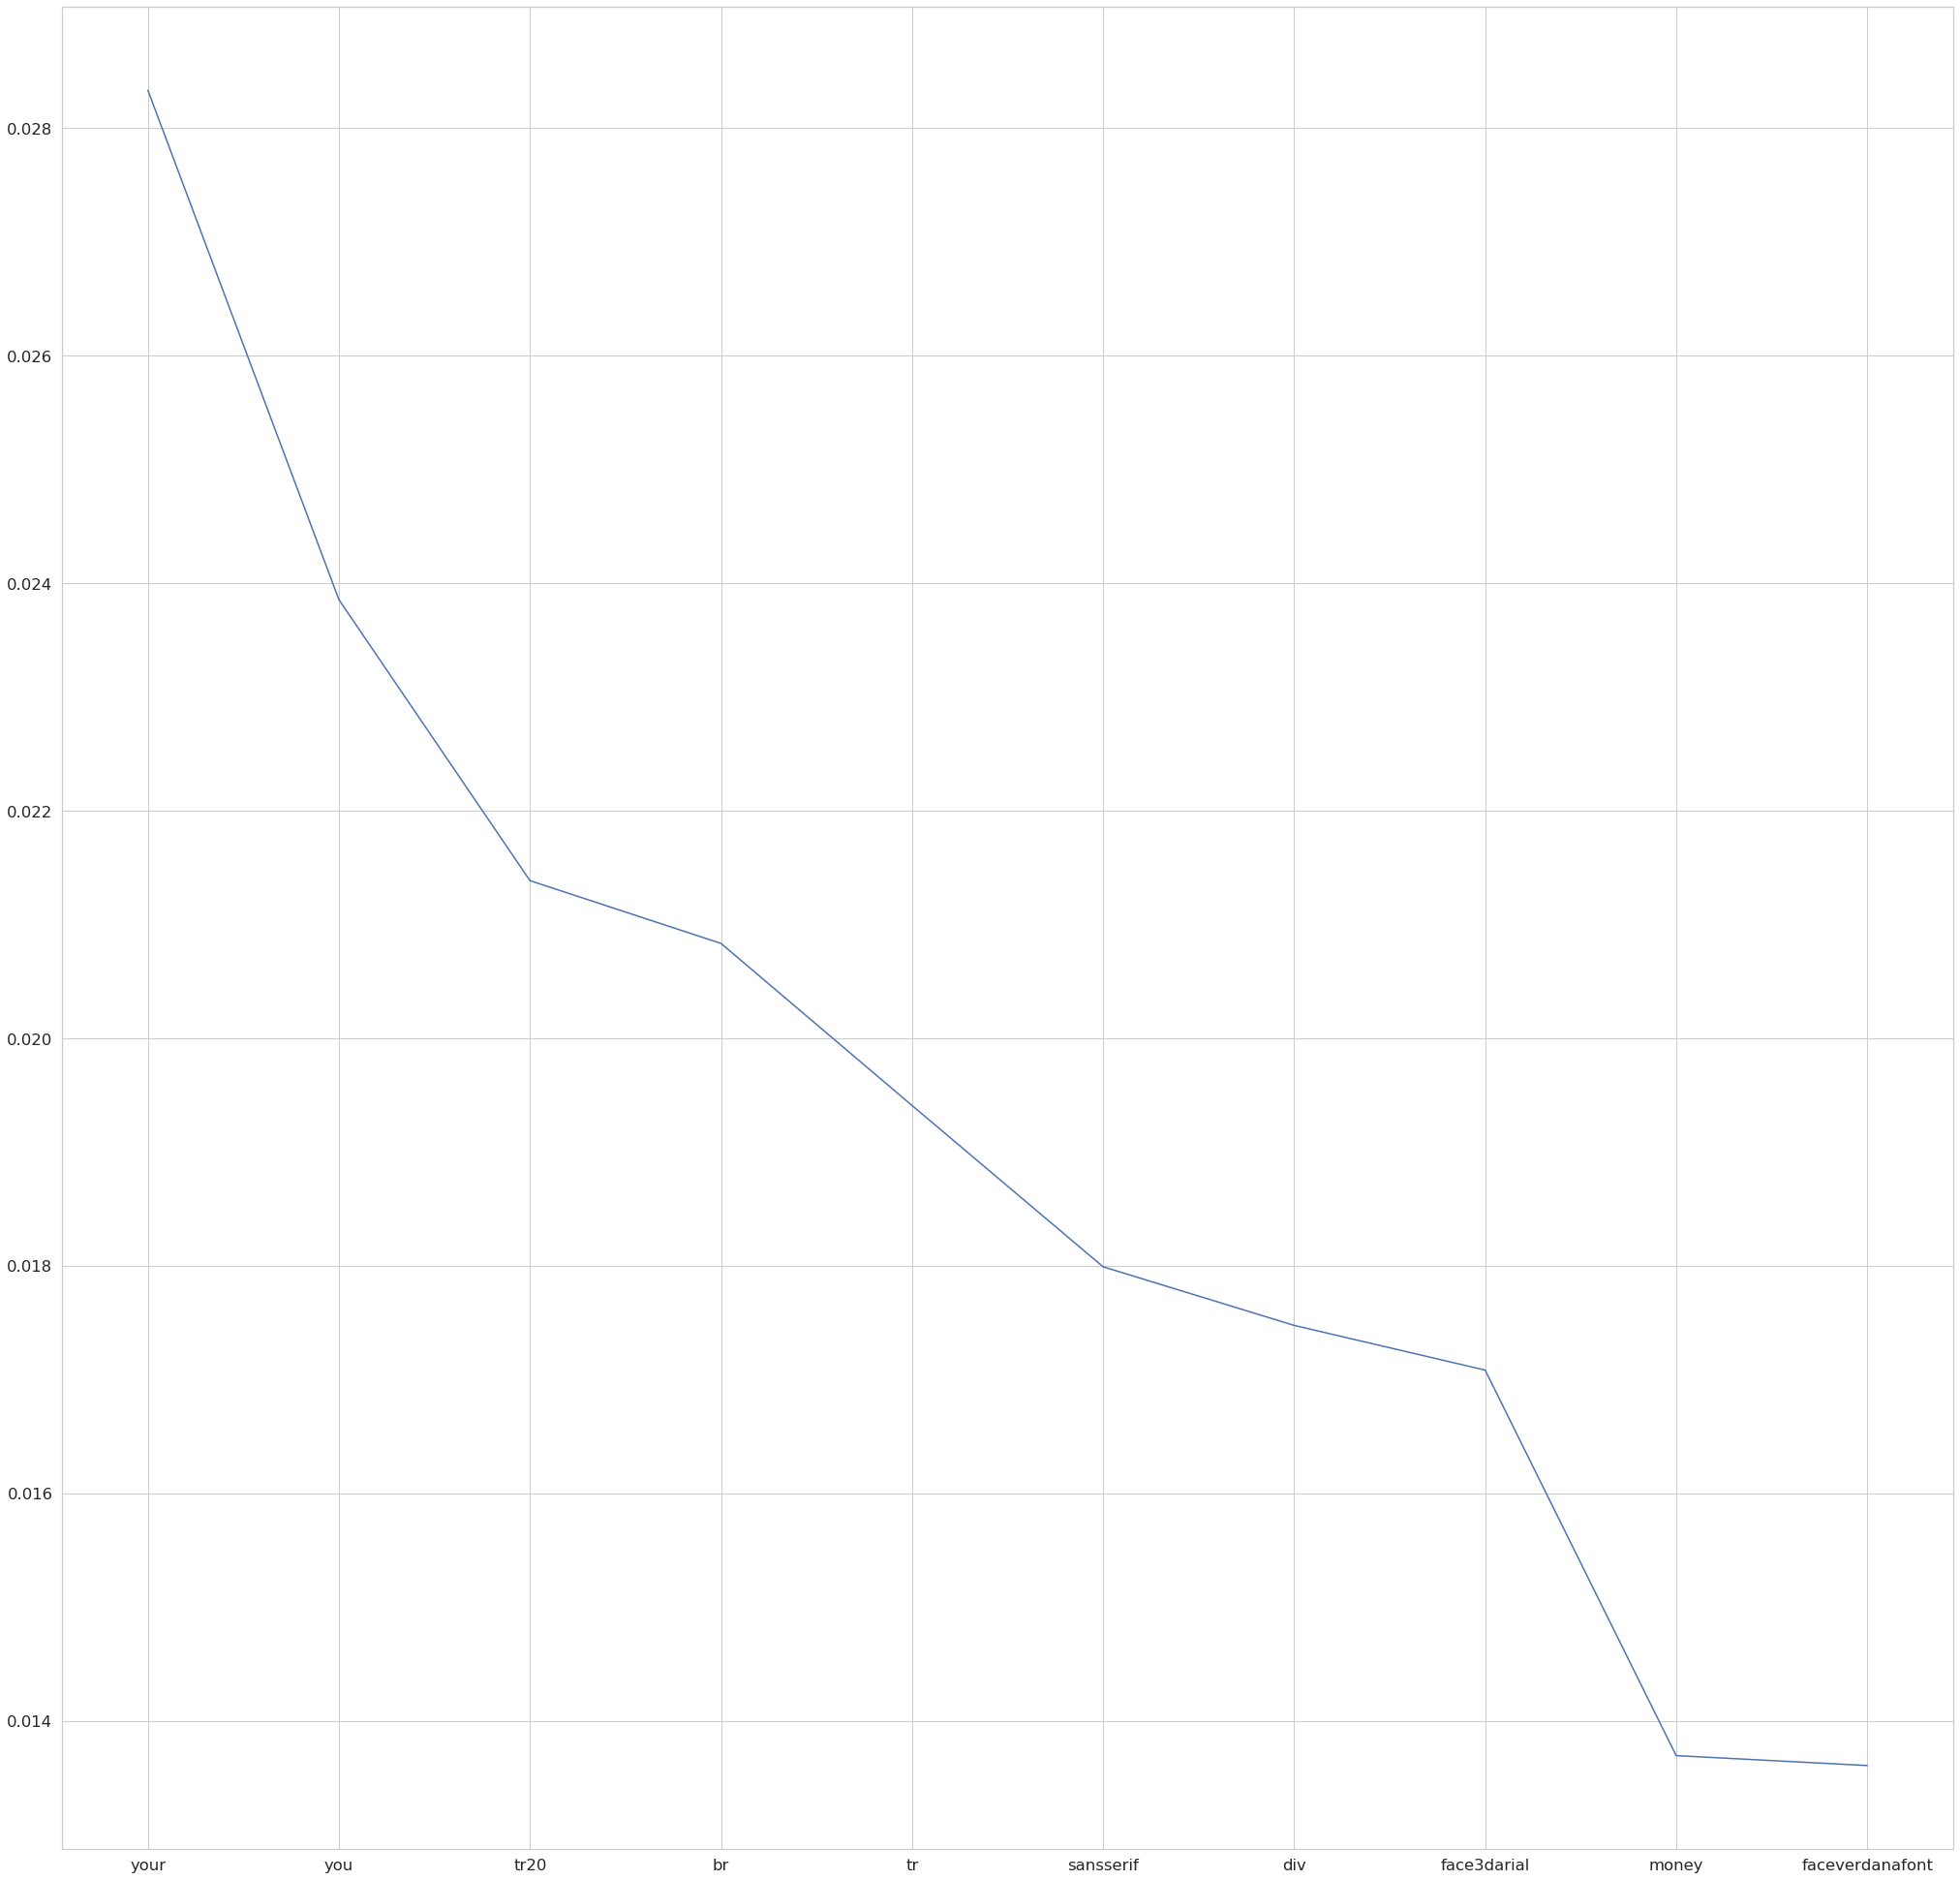

In [17]:
# Write your description (2-3 sentences) as a comment here:
# I want to find the top 10 most common words found in spam and ham emails
# Since I had a list of common spam words above, I wanted to test this out!
# As a result, it looks like 'your' and 'you' are a few of the most common 
# words that we can use to distinguish between ham/spam emails.
# This was a really good experience, as I was able to learn how to manipulate
# the data to do what I wanted after creating a new dataframe.

# Write the code to generate your visualization here:

import re

def get_words(s, brackets):
    mywords = s.split()
    regex = '\W+'
    mywords = [re.sub(regex, '', i) for i in mywords]
    for i in mywords:
        if i:
            if i not in brackets:
                brackets[i] = 0
            brackets[i] += 1

spam = train[train["spam"] == 1]
ham = train[train["spam"] == 0]

spams = {}
hams = {}

s = spam["email"].map(lambda a: get_words(a, spams))
h = ham["email"].map(lambda a: get_words(a, hams))

spam_set = set(spams.keys())
ham_set = set(hams.keys())
common = list(spam_set.union(ham_set))

def find_num(x):
    return [0 if (c not in x) else x[c]/len(x) for c in common]

spam_num = find_num(spams)
ham_num = find_num(hams)

df = pd.DataFrame({"common word": common,"spam_num": spam_num,"ham_num": ham_num})

df["difference"] = df["spam_num"] - df["ham_num"]

df.sort_values(by=["difference"], inplace=True, ascending=False)

df = df.set_index("common word")

top10 = df["difference"].head(10)

plt.figure(figsize=(35,35))

plt.plot(top10)

# Note: if your plot doesn't appear in the PDF, you should try uncommenting the following line:
# plt.show()

# Question 9: Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

Save your predictions in a 1-dimensional array called `test_predictions`. *Even if you are not submitting to Kaggle, please make sure you've saved your predictions to `test_predictions` as this is how your score for this question will be determined.*

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/c76d80f7d3204159865a324ec2936f18

**Note: You may submit up to 4 times a day. If you have submitted 4 times on a day, you will need to wait until the next day for more submissions.**

Note that this question is graded on an absolute scale based on the accuracy your model achieves on the test set and the score does not depend on your ranking on Kaggle. 

*The provided tests check that your predictions are in the correct format, but you must submit to Kaggle to evaluate your classifier accuracy.*

<!--
BEGIN QUESTION
name: q9
points: 15
-->

In [18]:
test_predictions = my_model.predict(words_in_texts(my_words, test['email']))
test_predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,

In [19]:
ok.grade("q9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The following saves a file to submit to Kaggle.

In [20]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-04-27T13:26:07.csv.
You may now upload this CSV file to Kaggle for scoring.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 5 EXPORTED QUESTIONS -->

In [ ]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj2b.ipynb', 'proj2b.pdf')
ok.submit()

Generating PDF...
Saved proj2b.pdf
